In [7]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Statistics on comments

In [3]:
#read comments stored in multiple csv files in a folder and concat them all in one df. Remove duplicates if there are any.

In [14]:
def read_folder(csv_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    csv_folder = Path(csv_folder).absolute()
    csv_files = [f for f in csv_folder.iterdir() if f.name.endswith('csv')]
    # the assign() method adds a helper column
    dfs = [
        pd.read_csv(csv_file)for idx, csv_file in enumerate(csv_files, 1)
    ]
    return dfs

In [17]:
def concat_csv_files(folder_name='data_raw/comments'):
    dfs = read_folder(folder_name)
    all_comments_df = pd.DataFrame()
    for df in dfs:
        df = df.drop(['Unnamed: 0'], axis=1)
        all_comments_df = pd.concat([all_comments_df, df]).drop_duplicates().reset_index(drop=True) 
    return all_comments_df

In [18]:
all_comments_df = concat_csv_files()

/home/florian/university/WS2020/Social Media Seminar/social_media_youtube_analysis_project/data_raw/comments


In [19]:
all_comments_df.head()

id                    threadId  \
0  UgyNCm-SjOqd7jwszL54AaABAg  UgyNCm-SjOqd7jwszL54AaABAg   
1  UgxSiQA3GhONLu6aJjx4AaABAg  UgxSiQA3GhONLu6aJjx4AaABAg   
2  UgyMSdJQGbhRJZDlzat4AaABAg  UgyMSdJQGbhRJZDlzat4AaABAg   
3  UgyBw2Ka2wUgZdad5h14AaABAg  UgyBw2Ka2wUgZdad5h14AaABAg   
4  UgxhcGVxIyoY3dfrNex4AaABAg  UgxhcGVxIyoY3dfrNex4AaABAg   

           published_at         author_name  \
0  2021-02-08T14:44:35Z       Richard Fritz   
1  2021-02-08T05:57:30Z            Lawrence   
2  2021-02-08T05:16:51Z           John Rose   
3  2021-02-07T23:22:19Z       James Everett   
4  2021-02-07T19:44:39Z  medexamtoolsdotcom   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Al Gore laughing all the way to bank   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      The Global Warming idea was simply introduced by the U.S to substitute for the tension which would disappear with the collapse of the Iron Curtain/Berlin Wall in 1989. That's its primary purpose.   
2  The Paris agreements make no sense if China and India are not following them...  The US and some European countries have recently met their agreement goals and exceed the goals...just about 30% reduction in CO... However, China is at 5 TIMES the CO output than in 1978..due to burning COAL at an all time high... They are burning coal to produce cheap power...this is great for industry and production as well as consumer usage...Ultimately this will increase the China's GNP and GDP... While other countries are trying to go green, this is a burden on industry and very costly, China continues to cheat and disregard the Paris agreements.. Ultimate goal is to increase it's YEN market value....   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [21]:
def stats(name_csv_or_df: "pd.DataFrame or str") -> pd.DataFrame:
    """
    Creates basic statistics for a given DataFrame or csv file.
    """
    if(isinstance(name_csv_or_df, str)):
        df = pd.read_csv('data_raw/' + name_csv_or_df)
        name = name_csv_or_df
    elif(isinstance(name_csv_or_df, pd.DataFrame)):
        df = name_csv_or_df
        name = None
    else:
        raise TypeError("stats() takes pandas.DataFrame or string as input.")
        
    num_comments = df.shape[0]
    num_authors = len(df.author_name.value_counts())
    num_single_comment_authors = sum(df.author_name.value_counts()==1)
    return pd.DataFrame([[name, num_comments, num_authors, num_single_comment_authors, num_comments/num_authors, df.author_name.value_counts()[0], df.author_name.value_counts().index[0]]], columns=["csv_name", "number_comments", "number_authors", "number_single_comment_authors", "average_comment_count", "most_comments", "user_with_most_comments"]) 

In [22]:
stat = stats(all_comments_df)

In [23]:
stat

csv_name  number_comments  number_authors  number_single_comment_authors  \
0     None            27804           17552                          13494   

   average_comment_count  most_comments user_with_most_comments  
0               1.584093             70                 Rick TD

(array([0.0000e+00, 1.3494e+04, 2.1170e+03, 7.8200e+02, 3.9100e+02,
        2.5100e+02, 1.4300e+02, 1.0400e+02, 6.8000e+01, 5.3000e+01,
        2.7000e+01, 2.7000e+01, 1.6000e+01, 1.4000e+01, 9.0000e+00,
        1.2000e+01, 1.0000e+01, 8.0000e+00, 2.0000e+00, 4.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12

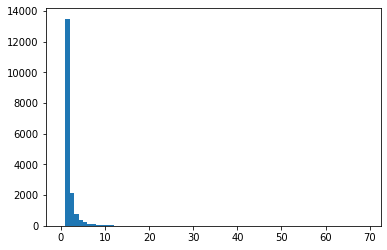

In [24]:
hist = plt.hist(all_comments_df.author_name.value_counts(), bins=[i for i in range(stat.most_comments[0])] )

In [95]:
df = all_comments_df
g = df.groupby(["author_name", "text"]).size().reset_index()
g[g[0]>10]

author_name                                               text   0
161    Alice Stevens  Big Guy and  his side kick Kamel toe Harris ma...  12
1031          Gustav  "The message, then, is that trees can play a s...  12
1979  Pedro Teixeira                                          Despacito  15
1986  Pedro Teixeira                                    TRUMP 2Q2Q baby  12

In [57]:
# Identical comments:
df.text.value_counts()

Despacito                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      15
First                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
# Look closer at one comment. All posted by the same user:
df[df.text=="Big Guy and  his side kick Kamel toe Harris making CHINA Great again ...."]

In [ ]:
df[df.text=="planet will warm up and it will be Paradise time again"]

In [20]:
# Users who commented under more than a single video:
g = df.groupby(["author_name"])["video_id"].nunique().reset_index()
g[g.video_id>1]

author_name  video_id
118       Andrew         2
1576         amf         2

In [22]:
df[df.author_name=="amf"]

Unnamed: 0                          id                    threadId  \
7              7  Ugxk8GL2py0KtjJG-qJ4AaABAg  Ugxk8GL2py0KtjJG-qJ4AaABAg   
1061           7  Ugxk8GL2py0KtjJG-qJ4AaABAg  Ugxk8GL2py0KtjJG-qJ4AaABAg   
2115        1061  UgzuY7xu4MdA_eFHMN14AaABAg  UgzuY7xu4MdA_eFHMN14AaABAg   
2116        1062  UgyQlJIm2i_qsmvYOT54AaABAg  UgyQlJIm2i_qsmvYOT54AaABAg   
3274           7  Ugxk8GL2py0KtjJG-qJ4AaABAg  Ugxk8GL2py0KtjJG-qJ4AaABAg   
4328        1061  UgzuY7xu4MdA_eFHMN14AaABAg  UgzuY7xu4MdA_eFHMN14AaABAg   
4329        1062  UgyQlJIm2i_qsmvYOT54AaABAg  UgyQlJIm2i_qsmvYOT54AaABAg   
6205           7  Ugxk8GL2py0KtjJG-qJ4AaABAg  Ugxk8GL2py0KtjJG-qJ4AaABAg   
7259        1061  UgzuY7xu4MdA_eFHMN14AaABAg  UgzuY7xu4MdA_eFHMN14AaABAg   
7260        1062  UgyQlJIm2i_qsmvYOT54AaABAg  UgyQlJIm2i_qsmvYOT54AaABAg   

              published_at author_name  \
7     2021-01-22T17:15:19Z         amf   
1061  2021-01-22T17:15:19Z         amf   
2115  2021-01-22T17:09:07Z         amf   
2116  2021-01-22T17:07:13Z         amf   
3274  2021-01-22T17:15:19Z         amf   
4328  2021-01-22T17:09:07Z         amf   
4329  2021-01-22T17:07:13Z         amf   
6205  2021-01-22T17:15:19Z         amf   
7259  2021-01-22T17:09:07Z         amf   
7260  2021-01-22T17:07:13Z         amf   

                                                   text  likeCount  is_reply  \
7     Would you bet your paycheck on a weather forec...        0.0       0.0   
1061  Would you bet your paycheck on a weather forec...        0.0       0.0   
2115  Would you bet your paycheck on a weather forec...        0.0       0.0   
2116  Joe Biden once called state-mandated school in...        0.0       0.0   
3274  Would you bet your paycheck on a weather forec...        0.0       0.0   
4328  Would you bet your paycheck on a weather forec...        0.0       0.0   
4329  Joe Biden once called state-mandated school in...        0.0       0.0   
6205  Would you bet your paycheck on a weather forec...        0.0       0.0   
7259  Would you bet your paycheck on a weather forec...        0.0       0.0   
7260  Joe Biden once called state-mandated school in...        0.0       0.0   

      cleaned     video_id  video_published_at  
7         NaN  k1oPVp63eNk                 NaN  
1061      NaN  k1oPVp63eNk                 NaN  
2115      NaN  ykSpM50paoY                 NaN  
2116      NaN  ykSpM50paoY                 NaN  
3274      NaN  k1oPVp63eNk                 NaN  
4328      NaN  ykSpM50paoY                 NaN  
4329      NaN  ykSpM50paoY                 NaN  
6205      NaN  k1oPVp63eNk                 NaN  
7259      NaN  ykSpM50paoY                 NaN  
7260      NaN  ykSpM50paoY                 NaN

In [28]:
df.video_id.value_counts()

k1oPVp63eNk    4216
ykSpM50paoY    3477
1yxeRrOtT7g    1436
x9WFM53D1Hc     554
Name: video_id, dtype: int64

In [31]:
df[df.author_name=="amf"].text.iloc[0]

'Would you bet your paycheck on a weather forecast for tomorrow? If not, then why should this country bet billions on global warming predictions that have even less foundation?'

In [32]:
df[df.author_name=="amf"].text.iloc[-1]

'Joe Biden once called state-mandated school integration “the most racist concept you can come up with,” and Barack Obama “the first sort of mainstream African American who is articulate and bright and clean.” He was a staunch opponent of “forced busing” in the 1970s, and leading crusader for mass incarceration throughout the ‘80s and ‘90s. Uncle Joe has described African-American felons as “predators” too sociopathic to rehabilitate — and white supremacist senators as his friends.⬅'

In [4]:
df = pd.DataFrame({'name': ['Ma', 'Donatello'],

                   'mask': ['red', 'green'],

                   'weapon': ['sword', 'bo staff']})

df.to_csv("test123.csv", index=False)